## Setup

**Import Statements**

In [58]:
import os
import matplotlib.pyplot as plt
import pandas as pd
from time import sleep
from sklearn.metrics import r2_score
from amb_sdk.sdk import DarwinSdk

**Connection to Darwin**

In [59]:
# Login
ds = DarwinSdk()
ds.set_url('https://amb-demo-api.sparkcognition.com/v1/')
status, msg = ds.auth_login_user('clarissamirandap@gmail.com', 'e4aQTsYYjP')

if not status:
    print(msg)


**Setup Path**

In [60]:
path = './sets/'

## Upload and Read Data

**Read Data**

In [65]:
# The dataset contains transactions from usa to latin america countries
dataset_name = 'remittances_latin_america.csv'
df = pd.read_csv(os.path.join(path, dataset_name))
df = df.dropna(how='all')
print(len(df))
df.head()

6762


,id,period,source_code,source_name,source_region,source_income,source_lending,source_G8G20,destination_code,destination_name,...,cc2 fx margin,cc2 total cost %,inter lcu bank fx,transparent,Standard Note,note2,receiving network coverage,pickup method,date,corridor
0,620163173.0,2016_2Q,USA,United States,..,High income,..,G8/G20,BRA,Brazil,...,1.45,2.44,3.46,yes,NaN,NaN,Medium,NaN,11/May/2016,USABRA
1,620163174.0,2016_2Q,USA,United States,..,High income,..,G8/G20,BRA,Brazil,...,1.45,2.44,3.46,yes,NaN,NaN,Low,Agent,11/May/2016,USABRA
2,620163175.0,2016_2Q,USA,United States,..,High income,..,G8/G20,BRA,Brazil,...,1.45,2.64,3.46,yes,NaN,NaN,Medium,NaN,11/May/2016,USABRA
3,620163176.0,2016_2Q,USA,United States,..,High income,..,G8/G20,BRA,Brazil,...,0.87,1.87,3.46,yes,Bank account payment,NaN,Medium,NaN,11/May/2016,USABRA
4,620163177.0,2016_2Q,USA,United States,..,High income,..,G8/G20,BRA,Brazil,...,0.87,1.87,3.46,yes,Bank account payment,NaN,Medium,NaN,11/May/2016,USABRA


In [66]:
# Due to emptyness of the columns source_region, source_lending
# As well incomplete cells on destination_G8G20, pickup method, Standard Note, note2
# Unvariability of destination_lending, source_G8G20, destination_region, cc1 lcu_code
# Repetetiveness of cc2 lcu amount	cc2 denomination amount	cc2 lcu code	cc2 lcu fee	cc2 lcu fx rate	cc2 fx margin	cc2 total cost %
# source_code, source_name, destination_code, destination_name can be resume in corridor, so they will be also dropped
# Unnecessary date and id were removed

df = df.drop(columns=['source_region', 'source_lending','destination_G8G20','source_G8G20','pickup method','Standard Note','note2','destination_lending','destination_region', 'cc1 lcu code'])
df = df.drop(columns=['cc2 lcu amount','cc2 denomination amount','cc2 lcu code','cc2 lcu fee','cc2 lcu fx rate','cc2 fx margin','cc2 total cost %'])
df = df.drop(columns=['source_code','source_name','destination_code','destination_name'])
df = df.drop(columns=['date','id'])
df.head()

,period,source_income,destination_income,firm,firm_type,payment instrument,access point,speed actual,cc1 lcu amount,cc1 denomination amount,cc1 lcu fee,cc1 lcu fx rate,cc1 fx margin,cc1 total cost %,inter lcu bank fx,transparent,receiving network coverage,corridor
0,2016_2Q,High income,Upper middle income,Trans-Fast,Money Transfer Operator,Bank account transfer,Internet,Next day,200.0,200.0,4.99,3.41,1.45,3.94,3.46,yes,Medium,USABRA
1,2016_2Q,High income,Upper middle income,Viamericas,Money Transfer Operator,Cash,Agent,Next day,200.0,200.0,4.99,3.41,1.45,3.94,3.46,yes,Low,USABRA
2,2016_2Q,High income,Upper middle income,Viamericas,Money Transfer Operator,Bank account transfer,"Agent,Internet",Same day,200.0,200.0,5.99,3.41,1.45,4.44,3.46,yes,Medium,USABRA
3,2016_2Q,High income,Upper middle income,Western Union,Money Transfer Operator,Bank account transfer,Internet,3-5 days,200.0,200.0,5.00,3.43,0.87,3.37,3.46,yes,Medium,USABRA
4,2016_2Q,High income,Upper middle income,Ria,Money Transfer Operator,Bank account transfer,Internet,3-5 days,200.0,200.0,5.00,3.43,0.87,3.37,3.46,yes,Medium,USABRA


In [68]:
df = df.fillna(0)
print(len(df))
df.head()

6762


,period,source_income,destination_income,firm,firm_type,payment instrument,access point,speed actual,cc1 lcu amount,cc1 denomination amount,cc1 lcu fee,cc1 lcu fx rate,cc1 fx margin,cc1 total cost %,inter lcu bank fx,transparent,receiving network coverage,corridor
0,2016_2Q,High income,Upper middle income,Trans-Fast,Money Transfer Operator,Bank account transfer,Internet,Next day,200.0,200.0,4.99,3.41,1.45,3.94,3.46,yes,Medium,USABRA
1,2016_2Q,High income,Upper middle income,Viamericas,Money Transfer Operator,Cash,Agent,Next day,200.0,200.0,4.99,3.41,1.45,3.94,3.46,yes,Low,USABRA
2,2016_2Q,High income,Upper middle income,Viamericas,Money Transfer Operator,Bank account transfer,"Agent,Internet",Same day,200.0,200.0,5.99,3.41,1.45,4.44,3.46,yes,Medium,USABRA
3,2016_2Q,High income,Upper middle income,Western Union,Money Transfer Operator,Bank account transfer,Internet,3-5 days,200.0,200.0,5.00,3.43,0.87,3.37,3.46,yes,Medium,USABRA
4,2016_2Q,High income,Upper middle income,Ria,Money Transfer Operator,Bank account transfer,Internet,3-5 days,200.0,200.0,5.00,3.43,0.87,3.37,3.46,yes,Medium,USABRA


In [69]:
# Here the categorical variables will be translate into dummy columns
# period, source_income, destination_income, firm, firm_type, payment instrument, access point, speed actual, transparent, receiving network coverage and corridor

columns_to_encode = ['period', 'source_income', 'destination_income', 'firm', 'firm_type', 'payment instrument', 'access point', 'speed actual', 'transparent', 'receiving network coverage', 'corridor']
for column_label in columns_to_encode:
    df = pd.concat([df,pd.get_dummies(df[column_label], prefix=column_label)],axis=1)
    df.drop([column_label],axis=1, inplace=True)
df.head()

,cc1 lcu amount,cc1 denomination amount,cc1 lcu fee,cc1 lcu fx rate,cc1 fx margin,cc1 total cost %,inter lcu bank fx,period_2011_1Q,period_2011_3Q,period_2012_1Q,...,corridor_USAGTM,corridor_USAGUY,corridor_USAHND,corridor_USAHTI,corridor_USAJAM,corridor_USAMEX,corridor_USANIC,corridor_USAPAN,corridor_USAPER,corridor_USASLV
0,200.0,200.0,4.99,3.41,1.45,3.94,3.46,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,200.0,200.0,4.99,3.41,1.45,3.94,3.46,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,200.0,200.0,5.99,3.41,1.45,4.44,3.46,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,200.0,200.0,5.00,3.43,0.87,3.37,3.46,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,200.0,200.0,5.00,3.43,0.87,3.37,3.46,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
# After all this data featuring, save the dataframe as csv
dataset_name = 'remittances_process_latin_america.csv'
df.to_csv(os.path.join(path, dataset_name))

**Upload to Darwin**

In [71]:
# Upload dataset
status, message = ds.delete_dataset(dataset_name)
status, dataset = ds.upload_dataset(os.path.join(path, dataset_name))
if not status:
    print(dataset)

## Clean Data

In [72]:
# clean dataset
target = "cc1 fx margin"
status, job_id = ds.clean_data(dataset_name, target=target)

if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

{'status': 'Taken', 'starttime': '2019-04-20T23:38:22.311899', 'endtime': None, 'percent_complete': 0, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['remittances_process_latin_america.csv'], 'artifact_names': ['39cc8ecca6834d07a44d921a41dc8270'], 'model_name': None, 'job_error': None}
{'status': 'Complete', 'starttime': '2019-04-20T23:38:22.311899', 'endtime': '2019-04-20T23:38:31.666727', 'percent_complete': 100, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['remittances_process_latin_america.csv'], 'artifact_names': ['39cc8ecca6834d07a44d921a41dc8270'], 'model_name': None, 'job_error': ''}


## Create and Train Model

In [76]:
model = target + "_model0"
ds.delete_model(model)
status, job_id = ds.create_model(dataset_names = dataset_name, \
                                 model_name =  model, \
                                 max_train_time = '00:02')
if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

{'status': 'Requested', 'starttime': '2019-04-20T23:40:31.989974', 'endtime': None, 'percent_complete': 0, 'job_type': 'TrainModel', 'loss': None, 'generations': 0, 'dataset_names': ['remittances_process_latin_america.csv'], 'artifact_names': None, 'model_name': 'cc1 fx margin_model0', 'job_error': None}
{'status': 'Running', 'starttime': '2019-04-20T23:40:31.989974', 'endtime': None, 'percent_complete': 0, 'job_type': 'TrainModel', 'loss': None, 'generations': 0, 'dataset_names': ['remittances_process_latin_america.csv'], 'artifact_names': None, 'model_name': 'cc1 fx margin_model0', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-20T23:40:31.989974', 'endtime': None, 'percent_complete': 0, 'job_type': 'TrainModel', 'loss': None, 'generations': 0, 'dataset_names': ['remittances_process_latin_america.csv'], 'artifact_names': None, 'model_name': 'cc1 fx margin_model0', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-20T23:40:31.989974', 'endtime': None, 'percent

## Analyze Data

In [77]:
# Retrieve feature importance of built model
status, artifact = ds.analyze_model(model)
sleep(1)
if status:
    ds.wait_for_job(artifact['job_name'])
else:
    print(artifact)

{'status': 'Running', 'starttime': '2019-04-20T23:42:57.18343', 'endtime': None, 'percent_complete': 0, 'job_type': 'AnalyzeModel', 'loss': 0.0006132044339513717, 'generations': 0, 'dataset_names': None, 'artifact_names': ['01a048eb60734ad788b10008c0623a3f'], 'model_name': 'cc1 fx margin_model0', 'job_error': ''}
{'status': 'Complete', 'starttime': '2019-04-20T23:42:57.18343', 'endtime': '2019-04-20T23:42:58.849745', 'percent_complete': 100, 'job_type': 'AnalyzeModel', 'loss': 0.0006132044339513717, 'generations': 0, 'dataset_names': None, 'artifact_names': ['01a048eb60734ad788b10008c0623a3f'], 'model_name': 'cc1 fx margin_model0', 'job_error': ''}


In [78]:
status, feature_importance = ds.download_artifact(artifact['artifact_name'])
feature_importance[:10]

cc1 total cost %          0.607597
cc1 lcu fee               0.203241
cc1 lcu fx rate           0.077718
inter lcu bank fx         0.076889
corridor_USABRA = 1       0.011611
corridor_USAHND = 1       0.007777
period_2014_2Q = 1        0.005135
Unnamed: 0                0.002098
access point_Agent = 1    0.001290
corridor_USADOM = 1       0.000708
dtype: float64

**Model Prediction**

In [79]:
status, artifact = ds.run_model(dataset_name, model)
sleep(1)
ds.wait_for_job(artifact['job_name'])

{'status': 'Running', 'starttime': '2019-04-20T23:43:32.72609', 'endtime': None, 'percent_complete': 0, 'job_type': 'RunModel', 'loss': 0.0006132044339513717, 'generations': 0, 'dataset_names': ['remittances_process_latin_america.csv'], 'artifact_names': ['d5f5a5dcc4ce4933a658db41cee2a070'], 'model_name': 'cc1 fx margin_model0', 'job_error': ''}
{'status': 'Complete', 'starttime': '2019-04-20T23:43:32.72609', 'endtime': '2019-04-20T23:43:34.052067', 'percent_complete': 100, 'job_type': 'RunModel', 'loss': 0.0006132044339513717, 'generations': 0, 'dataset_names': ['remittances_process_latin_america.csv'], 'artifact_names': ['d5f5a5dcc4ce4933a658db41cee2a070'], 'model_name': 'cc1 fx margin_model0', 'job_error': ''}


(True, 'Job completed')

**Get Predictions from Darwin**

In [80]:
status, prediction = ds.download_artifact(artifact['artifact_name'])
prediction.head()

,cc1 fx margin
0,1.425264
1,1.456944
2,1.475155
3,0.866535
4,0.872789


6762


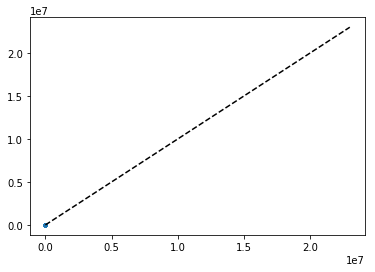

R^2 :  0.9986613363960315


In [81]:
#Plot predictions vs actual
print(len(prediction[target]))
#print(prediction[target][0])

#print(prediction[target][0])
#prediction[target].replace("Less than one hour", 0.05)
#prediction[target].replace("Less than one hour", 0.05)
#for i in range(0, 4574):
#    if prediction[target][i] == "Less than one hour":
#        prediction[target][i] = 0.05
plt.plot(df[target], prediction[target], '.')
plt.plot([0,2.3e7],[0,2.3e7],'--k')
plt.show()
print('R^2 : ', r2_score(df[target], prediction[target]))